# 6.1 매개변수 갱신
## 6.1.2 확률적 경사 하강법

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## 6.1.4 모멘텀

In [ ]:

import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] += self.v[key]

# 6.1.5 AdaGrad

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sort(self.h[key] + 1e-7))
            

# 6.2 가중치의 초깃값

===========iteration:0===========
SGD:2.3004092334916715
Momentum:2.3818044093571396
AdaGrad:2.084789324408297
Adam:2.252277127927695
===========iteration:100===========
SGD:1.6826491597334365
Momentum:0.3381421462133708
AdaGrad:0.12233181260034943
Adam:0.21434689874353005
===========iteration:200===========
SGD:0.8909749276428597
Momentum:0.33599844866450174
AdaGrad:0.15146959440473312
Adam:0.2571603662998828
===========iteration:300===========
SGD:0.5632257434953697
Momentum:0.20683542655788104
AdaGrad:0.0811062949341161
Adam:0.13537620300943784
===========iteration:400===========
SGD:0.4763320165884717
Momentum:0.20019982126477398
AdaGrad:0.09264573629824963
Adam:0.12445039013078743
===========iteration:500===========
SGD:0.4620468635322307
Momentum:0.1783687886244954
AdaGrad:0.07948144606031776
Adam:0.1028035958110726
===========iteration:600===========
SGD:0.32424898324908513
Momentum:0.12035622655386091
AdaGrad:0.0714937838239845
Adam:0.07072854002528961
===========iteration:700=

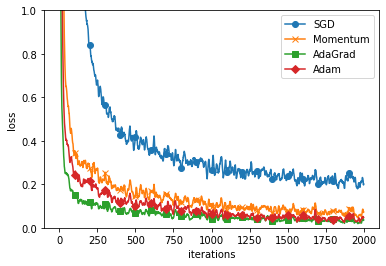

In [1]:
# coding: utf-8
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

sys.path.append("./common")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["Adam"] = Adam()
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10
    )
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(
        x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key
    )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2.2 은닉층의 활성화값 분포

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

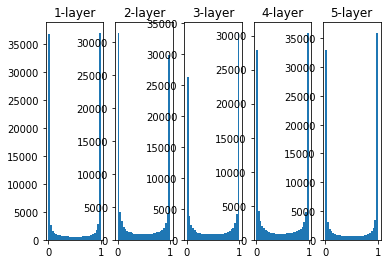

In [3]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

In [4]:
w = np.random.randn(node_num, node_num) * 0.01

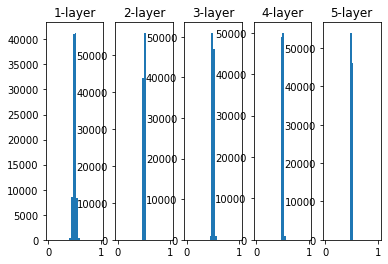

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

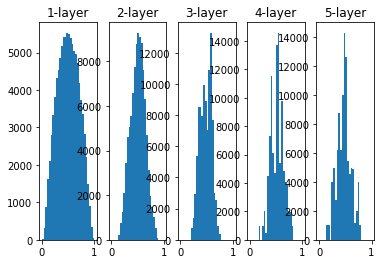

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

## 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025447344868106
Xavier:2.301683132210816
He:2.280738632186457
===========iteration:100===========
std=0.01:2.302944491979498
Xavier:2.2617840017248367
He:1.3836549120259405
===========iteration:200===========
std=0.01:2.3017704388641542
Xavier:2.1465949311045813
He:0.609906423729681
===========iteration:300===========
std=0.01:2.302478930180984
Xavier:1.8921665234061709
He:0.5505245882930456
===========iteration:400===========
std=0.01:2.3021849814258033
Xavier:1.4126768767770832
He:0.41829892440890315
===========iteration:500===========
std=0.01:2.301754147780704
Xavier:1.0496024943899314
He:0.40325717487034385
===========iteration:600===========
std=0.01:2.3004944808689687
Xavier:0.6887139237259181
He:0.3948947465352589
===========iteration:700===========
std=0.01:2.303280395247408
Xavier:0.765793241457279
He:0.4166505515500222
===========iteration:800===========
std=0.01:2.3022756930822164
Xavier:0.4984661187043875
He:0.2883880050810925


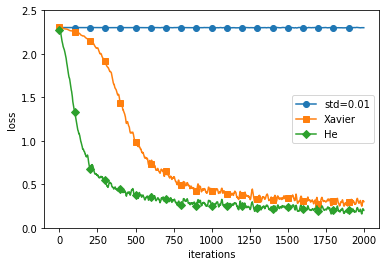

In [9]:
# coding: utf-8
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 6.3 배치 
## 6.3.2 배치 정규화의 효과


============== 1/16 ==============
epoch:0 | 0.087 - 0.092


g:\내 드라이브\Colab Notebooks\밑바닥부터 시작하는 딥러닝\ch06\..\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
g:\내 드라이브\Colab Notebooks\밑바닥부터 시작하는 딥러닝\ch06\..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.121
epoch:2 | 0.097 - 0.135
epoch:3 | 0.097 - 0.163
epoch:4 | 0.097 - 0.175
epoch:5 | 0.097 - 0.185
epoch:6 | 0.097 - 0.203
epoch:7 | 0.097 - 0.219
epoch:8 | 0.097 - 0.237
epoch:9 | 0.097 - 0.254
epoch:10 | 0.097 - 0.28
epoch:11 | 0.097 - 0.297
epoch:12 | 0.097 - 0.312
epoch:13 | 0.097 - 0.319
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.36
epoch:16 | 0.097 - 0.378
epoch:17 | 0.097 - 0.389
epoch:18 | 0.097 - 0.392


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.4
============== 2/16 ==============
epoch:0 | 0.094 - 0.108


g:\내 드라이브\Colab Notebooks\밑바닥부터 시작하는 딥러닝\ch06\..\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


epoch:1 | 0.097 - 0.124
epoch:2 | 0.097 - 0.123
epoch:3 | 0.097 - 0.153
epoch:4 | 0.097 - 0.194
epoch:5 | 0.097 - 0.223
epoch:6 | 0.097 - 0.238
epoch:7 | 0.097 - 0.264
epoch:8 | 0.097 - 0.296
epoch:9 | 0.097 - 0.324
epoch:10 | 0.097 - 0.351
epoch:11 | 0.097 - 0.376
epoch:12 | 0.097 - 0.384
epoch:13 | 0.097 - 0.389
epoch:14 | 0.097 - 0.405
epoch:15 | 0.097 - 0.427
epoch:16 | 0.097 - 0.449
epoch:17 | 0.097 - 0.454
epoch:18 | 0.097 - 0.474


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.489
============== 3/16 ==============
epoch:0 | 0.105 - 0.082
epoch:1 | 0.402 - 0.093
epoch:2 | 0.562 - 0.126
epoch:3 | 0.665 - 0.172
epoch:4 | 0.726 - 0.216
epoch:5 | 0.777 - 0.264
epoch:6 | 0.818 - 0.296
epoch:7 | 0.862 - 0.339
epoch:8 | 0.9 - 0.373
epoch:9 | 0.916 - 0.405
epoch:10 | 0.93 - 0.438
epoch:11 | 0.951 - 0.453
epoch:12 | 0.963 - 0.489
epoch:13 | 0.97 - 0.513
epoch:14 | 0.972 - 0.525
epoch:15 | 0.977 - 0.56
epoch:16 | 0.985 - 0.582
epoch:17 | 0.986 - 0.604
epoch:18 | 0.991 - 0.626


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.992 - 0.637
============== 4/16 ==============
epoch:0 | 0.088 - 0.114
epoch:1 | 0.302 - 0.163
epoch:2 | 0.473 - 0.201
epoch:3 | 0.571 - 0.268
epoch:4 | 0.626 - 0.354
epoch:5 | 0.679 - 0.436
epoch:6 | 0.694 - 0.49
epoch:7 | 0.729 - 0.533
epoch:8 | 0.733 - 0.584
epoch:9 | 0.756 - 0.609
epoch:10 | 0.775 - 0.63
epoch:11 | 0.791 - 0.663
epoch:12 | 0.806 - 0.686
epoch:13 | 0.821 - 0.711
epoch:14 | 0.826 - 0.726
epoch:15 | 0.847 - 0.746
epoch:16 | 0.85 - 0.761
epoch:17 | 0.858 - 0.781
epoch:18 | 0.862 - 0.789


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.867 - 0.799
============== 5/16 ==============
epoch:0 | 0.113 - 0.115
epoch:1 | 0.112 - 0.142
epoch:2 | 0.112 - 0.283
epoch:3 | 0.112 - 0.412
epoch:4 | 0.113 - 0.505
epoch:5 | 0.113 - 0.581
epoch:6 | 0.113 - 0.632
epoch:7 | 0.115 - 0.689
epoch:8 | 0.115 - 0.716
epoch:9 | 0.116 - 0.738
epoch:10 | 0.116 - 0.762
epoch:11 | 0.116 - 0.791
epoch:12 | 0.116 - 0.804
epoch:13 | 0.121 - 0.819
epoch:14 | 0.122 - 0.839
epoch:15 | 0.123 - 0.849
epoch:16 | 0.124 - 0.856
epoch:17 | 0.124 - 0.866
epoch:18 | 0.125 - 0.874


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.128 - 0.877
============== 6/16 ==============
epoch:0 | 0.075 - 0.107
epoch:1 | 0.115 - 0.182
epoch:2 | 0.116 - 0.45
epoch:3 | 0.116 - 0.597
epoch:4 | 0.116 - 0.682
epoch:5 | 0.116 - 0.731
epoch:6 | 0.116 - 0.765
epoch:7 | 0.14 - 0.791
epoch:8 | 0.121 - 0.82
epoch:9 | 0.124 - 0.839
epoch:10 | 0.163 - 0.851
epoch:11 | 0.116 - 0.865
epoch:12 | 0.116 - 0.884
epoch:13 | 0.12 - 0.893
epoch:14 | 0.118 - 0.907
epoch:15 | 0.116 - 0.917
epoch:16 | 0.116 - 0.929
epoch:17 | 0.116 - 0.938
epoch:18 | 0.116 - 0.945
epoch:19 | 0.116 - 0.951


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 7/16 ==============
epoch:0 | 0.099 - 0.176
epoch:1 | 0.116 - 0.295
epoch:2 | 0.116 - 0.591
epoch:3 | 0.116 - 0.741
epoch:4 | 0.116 - 0.805
epoch:5 | 0.116 - 0.827
epoch:6 | 0.116 - 0.841
epoch:7 | 0.116 - 0.861
epoch:8 | 0.116 - 0.897
epoch:9 | 0.116 - 0.918
epoch:10 | 0.116 - 0.932
epoch:11 | 0.117 - 0.948
epoch:12 | 0.116 - 0.957
epoch:13 | 0.116 - 0.961
epoch:14 | 0.117 - 0.967
epoch:15 | 0.116 - 0.975
epoch:16 | 0.116 - 0.978
epoch:17 | 0.116 - 0.981
epoch:18 | 0.116 - 0.989


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.991
============== 8/16 ==============
epoch:0 | 0.118 - 0.138
epoch:1 | 0.116 - 0.344
epoch:2 | 0.116 - 0.576
epoch:3 | 0.116 - 0.679
epoch:4 | 0.116 - 0.752
epoch:5 | 0.116 - 0.829
epoch:6 | 0.116 - 0.881
epoch:7 | 0.116 - 0.914
epoch:8 | 0.116 - 0.946
epoch:9 | 0.116 - 0.964
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.984
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.995
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 9/16 ==============
epoch:0 | 0.094 - 0.122
epoch:1 | 0.117 - 0.571
epoch:2 | 0.117 - 0.711
epoch:3 | 0.117 - 0.836
epoch:4 | 0.117 - 0.901
epoch:5 | 0.117 - 0.949
epoch:6 | 0.117 - 0.967
epoch:7 | 0.117 - 0.979
epoch:8 | 0.117 - 0.985
epoch:9 | 0.116 - 0.994
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.995
epoch:12 | 0.116 - 0.997
epoch:13 | 0.117 - 0.997
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.984
epoch:18 | 0.116 - 0.999
epoch:19 | 0.117 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 10/16 ==============
epoch:0 | 0.117 - 0.144
epoch:1 | 0.116 - 0.416
epoch:2 | 0.117 - 0.773
epoch:3 | 0.117 - 0.919
epoch:4 | 0.117 - 0.918
epoch:5 | 0.116 - 0.952
epoch:6 | 0.117 - 0.978
epoch:7 | 0.116 - 0.979
epoch:8 | 0.116 - 0.99
epoch:9 | 0.116 - 0.983
epoch:10 | 0.116 - 0.997
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 11/16 ==============
epoch:0 | 0.117 - 0.107
epoch:1 | 0.117 - 0.568
epoch:2 | 0.116 - 0.645
epoch:3 | 0.117 - 0.848
epoch:4 | 0.117 - 0.847
epoch:5 | 0.116 - 0.697
epoch:6 | 0.116 - 0.86
epoch:7 | 0.116 - 0.86
epoch:8 | 0.116 - 0.898
epoch:9 | 0.116 - 0.975
epoch:10 | 0.116 - 0.981
epoch:11 | 0.116 - 0.98
epoch:12 | 0.116 - 0.981
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.99
epoch:15 | 0.116 - 0.99
epoch:16 | 0.116 - 0.977
epoch:17 | 0.116 - 0.983
epoch:18 | 0.116 - 0.991


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.991
============== 12/16 ==============
epoch:0 | 0.117 - 0.165
epoch:1 | 0.097 - 0.505
epoch:2 | 0.116 - 0.609
epoch:3 | 0.116 - 0.643
epoch:4 | 0.116 - 0.699
epoch:5 | 0.116 - 0.743
epoch:6 | 0.116 - 0.772
epoch:7 | 0.116 - 0.761
epoch:8 | 0.116 - 0.714
epoch:9 | 0.116 - 0.759
epoch:10 | 0.116 - 0.789
epoch:11 | 0.116 - 0.771
epoch:12 | 0.116 - 0.799
epoch:13 | 0.116 - 0.8
epoch:14 | 0.116 - 0.8
epoch:15 | 0.116 - 0.803
epoch:16 | 0.116 - 0.799
epoch:17 | 0.117 - 0.8
epoch:18 | 0.117 - 0.804


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.804
============== 13/16 ==============
epoch:0 | 0.117 - 0.267
epoch:1 | 0.117 - 0.379
epoch:2 | 0.117 - 0.582
epoch:3 | 0.105 - 0.576
epoch:4 | 0.117 - 0.664
epoch:5 | 0.117 - 0.491
epoch:6 | 0.117 - 0.685
epoch:7 | 0.117 - 0.706
epoch:8 | 0.117 - 0.709
epoch:9 | 0.117 - 0.711
epoch:10 | 0.117 - 0.715
epoch:11 | 0.117 - 0.715
epoch:12 | 0.117 - 0.767
epoch:13 | 0.117 - 0.796
epoch:14 | 0.117 - 0.805
epoch:15 | 0.117 - 0.8
epoch:16 | 0.117 - 0.802
epoch:17 | 0.117 - 0.762
epoch:18 | 0.117 - 0.806


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.81
============== 14/16 ==============
epoch:0 | 0.097 - 0.105
epoch:1 | 0.1 - 0.467
epoch:2 | 0.1 - 0.524
epoch:3 | 0.116 - 0.572
epoch:4 | 0.116 - 0.574
epoch:5 | 0.116 - 0.563
epoch:6 | 0.116 - 0.58
epoch:7 | 0.116 - 0.539
epoch:8 | 0.116 - 0.593
epoch:9 | 0.116 - 0.598
epoch:10 | 0.116 - 0.604
epoch:11 | 0.116 - 0.604
epoch:12 | 0.116 - 0.602
epoch:13 | 0.116 - 0.618
epoch:14 | 0.116 - 0.607
epoch:15 | 0.116 - 0.619
epoch:16 | 0.116 - 0.658
epoch:17 | 0.117 - 0.556


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.699
epoch:19 | 0.117 - 0.707
============== 15/16 ==============
epoch:0 | 0.105 - 0.156
epoch:1 | 0.105 - 0.362
epoch:2 | 0.116 - 0.4
epoch:3 | 0.116 - 0.481
epoch:4 | 0.116 - 0.498
epoch:5 | 0.116 - 0.481
epoch:6 | 0.117 - 0.496
epoch:7 | 0.116 - 0.506
epoch:8 | 0.116 - 0.507
epoch:9 | 0.116 - 0.512
epoch:10 | 0.116 - 0.518
epoch:11 | 0.116 - 0.512
epoch:12 | 0.116 - 0.51
epoch:13 | 0.116 - 0.522
epoch:14 | 0.116 - 0.525
epoch:15 | 0.116 - 0.523
epoch:16 | 0.116 - 0.524
epoch:17 | 0.116 - 0.52


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.516
epoch:19 | 0.116 - 0.518
============== 16/16 ==============
epoch:0 | 0.117 - 0.146
epoch:1 | 0.117 - 0.219
epoch:2 | 0.117 - 0.296
epoch:3 | 0.117 - 0.356
epoch:4 | 0.117 - 0.404
epoch:5 | 0.117 - 0.401
epoch:6 | 0.117 - 0.407
epoch:7 | 0.117 - 0.401
epoch:8 | 0.117 - 0.402
epoch:9 | 0.117 - 0.411
epoch:10 | 0.117 - 0.501
epoch:11 | 0.117 - 0.495
epoch:12 | 0.117 - 0.498
epoch:13 | 0.117 - 0.51
epoch:14 | 0.117 - 0.507
epoch:15 | 0.117 - 0.506
epoch:16 | 0.117 - 0.505
epoch:17 | 0.117 - 0.509
epoch:18 | 0.117 - 0.505
epoch:19 | 0.117 - 0.509


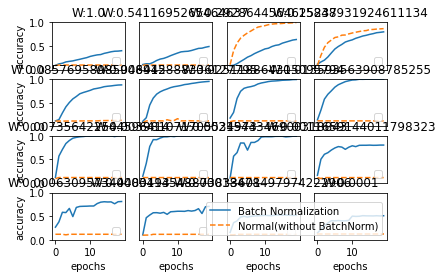

In [10]:
# coding: utf-8
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [12]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100
train_loss_lsit = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


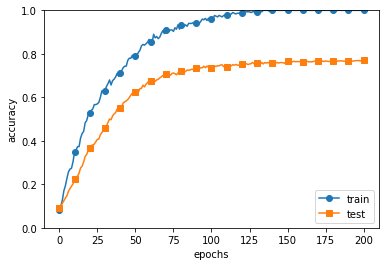

In [13]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.4.3 드롭아웃

In [14]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.312891889499048
=== epoch:1, train acc:0.11333333333333333, test acc:0.1074 ===
train loss:2.3136034034426665
train loss:2.3152389835608265
train loss:2.3113492374703837
=== epoch:2, train acc:0.11333333333333333, test acc:0.107 ===
train loss:2.309989553084491
train loss:2.3120976631070245
train loss:2.310409627697432
=== epoch:3, train acc:0.11666666666666667, test acc:0.1078 ===
train loss:2.3135013171251266
train loss:2.297134197530402
train loss:2.3040049197103216
=== epoch:4, train acc:0.11333333333333333, test acc:0.1079 ===
train loss:2.3024238675169486
train loss:2.3175091307851243
train loss:2.30941406717576
=== epoch:5, train acc:0.11333333333333333, test acc:0.1079 ===
train loss:2.310261123957143
train loss:2.3067328375384992
train loss:2.3136983493344148
=== epoch:6, train acc:0.11333333333333333, test acc:0.1092 ===
train loss:2.3150439147670214
train loss:2.29868597462684
train loss:2.296354877862981
=== epoch:7, train acc:0.11666666666666667, test acc:0.10

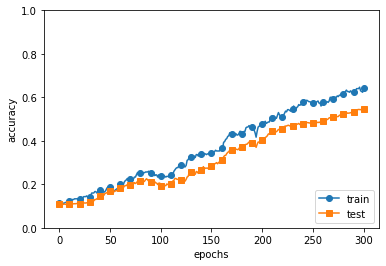

In [15]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784,
                              hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout,
                              dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 6.5 적절한 하이퍼파라미터 값 찾기
## 6.5.1 검증 데이터

In [17]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation, :] if x.ndim == 2 else x[permutation, :, :, :]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

## 6.5.3 하이퍼파라미터 최적화 구현하기

val acc:0.1 | lr:7.863846727935028e-06, weight decay:7.723522806936419e-05
val acc:0.3 | lr:0.0015384242381853827, weight decay:4.904636784590184e-07
val acc:0.1 | lr:2.2173066839427055e-05, weight decay:5.751093217126086e-08
val acc:0.08 | lr:4.242566648489342e-06, weight decay:7.161573844578442e-05
val acc:0.16 | lr:5.538665925870249e-05, weight decay:5.729437533224602e-05
val acc:0.11 | lr:4.215275977134793e-05, weight decay:1.8446864730749817e-06
val acc:0.16 | lr:1.8780583492777763e-06, weight decay:6.630354532594487e-05
val acc:0.07 | lr:1.1511672510578877e-06, weight decay:2.167118812053596e-06
val acc:0.4 | lr:0.0029395400379483303, weight decay:8.38848018441007e-06
val acc:0.12 | lr:1.6243115289353636e-06, weight decay:3.3028600468903674e-05
val acc:0.28 | lr:0.0015385457387848754, weight decay:1.1175906494878647e-06
val acc:0.13 | lr:0.0001929477559042787, weight decay:1.0286485624803206e-05
val acc:0.29 | lr:0.0014054853316721012, weight decay:7.839209965547588e-05
val acc:0

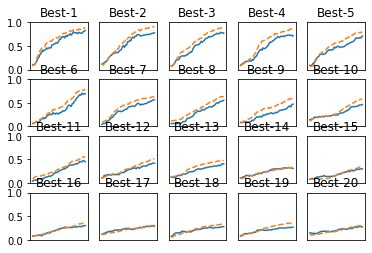

In [19]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()